## 3.3非线性回归

### 1激活函数
激活函数的作用是让线性问题变成非线性问题，这样就让神经网络的深度称为有价值的内容，为什么这么说是因为，如果不使用激活函数，那么神经网络的多层结构实际上可以用一个线性函数代替：
<img alt="神经网络叠层图" height="800" src="3-13.png" width="1600"/>

### 2 人工神经网络

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.unsqueeze(torch.linspace(-3, 3, 10000), dim=1)
y = x.pow(3) + 0.3 * torch.rand(x.size())

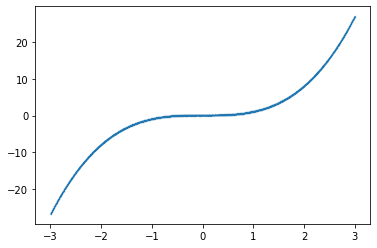

In [3]:
plt.scatter(x.numpy(), y.numpy(), s=0.01)
plt.show()

In [4]:
from torch import nn, optim
import torch.nn.functional as F

In [5]:
class Net(nn.Module):  # 继承 torch.nn 的 Module
    def __init__(self, input_feature, num_hidden, outputs):
        super(Net, self).__init__()  # 继承 __init__
        # 定义每层神经元的结构与数目
        self.hidden = nn.Linear(input_feature, num_hidden)  # 线性隐含层,设置回归函数输入输出纬度
        self.out = nn.Linear(num_hidden, outputs)  # 输出层

    def forward(self, x):
        # 前向传播输入值
        x = F.relu(self.hidden(x))  # 激励函数ReLU处理隐含层的输出
        x = self.out(x)  # 最终输出值
        return x

In [6]:
CUDA = torch.cuda.is_available()

if CUDA:
    net = Net(input_feature=1, num_hidden=20, outputs=1).cuda()
    inputs = x.cuda()
    target = y.cuda()
else:
    net = Net(input_feature=1, num_hidden=20, outputs=1)
    inputs = x
    target = y

In [7]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [8]:
def draw(output, loss):
    if CUDA:
        output = output.cpu()
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'loss=%s' % (loss.item()), fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)

In [9]:
def train(model, criterion, optimizer, epochs):
    for epoch in range(epochs):
        #forward
        output = model(inputs)
        loss = criterion(output, target)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 80 == 0:
            draw(output, loss)
    #plt.savefig('plot2.png', format='png')

    return model, loss

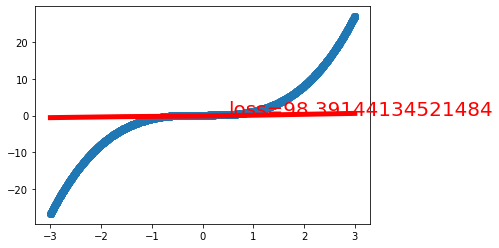

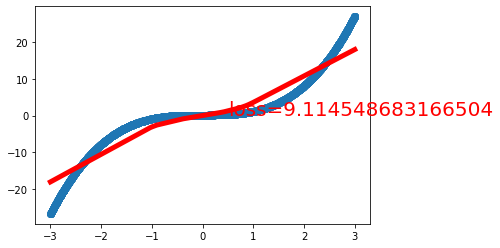

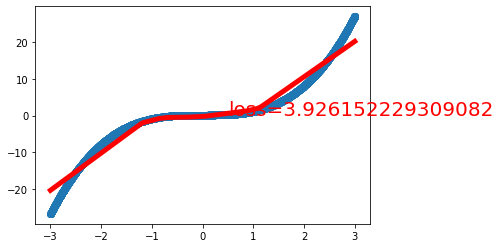

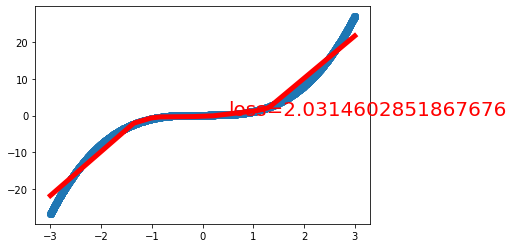

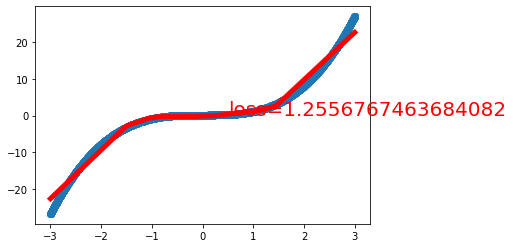

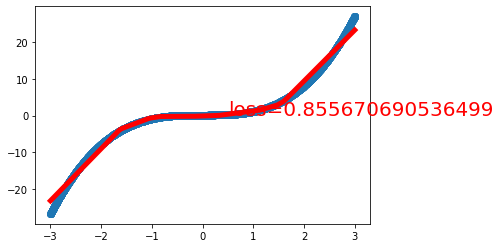

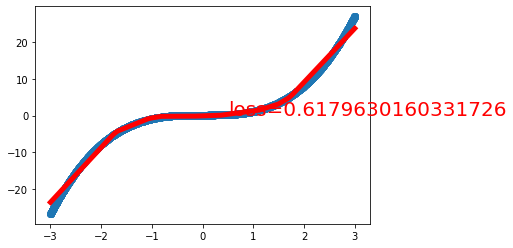

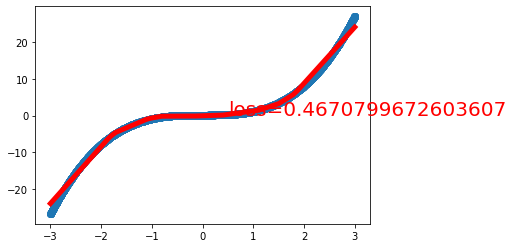

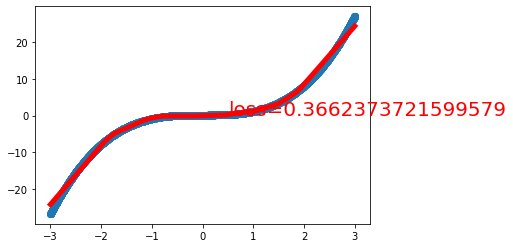

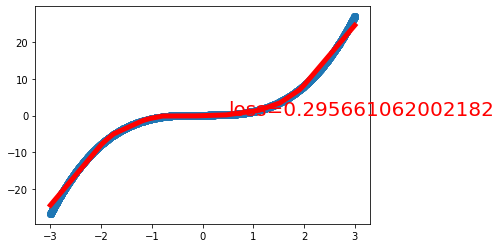

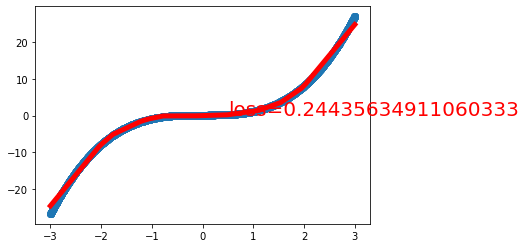

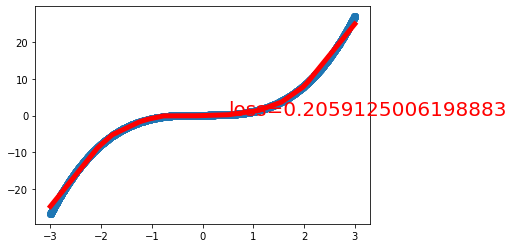

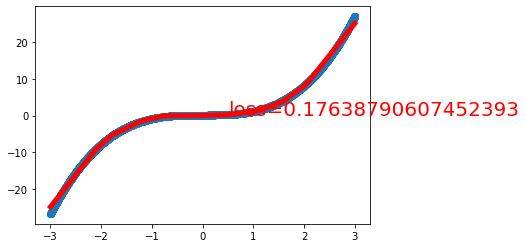

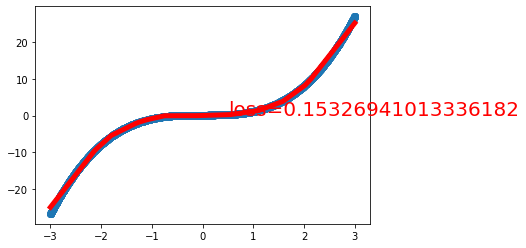

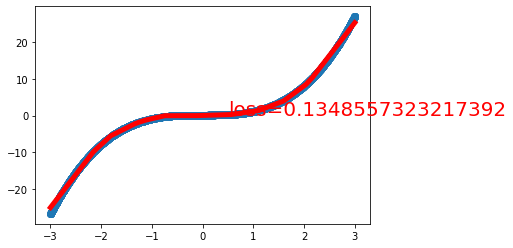

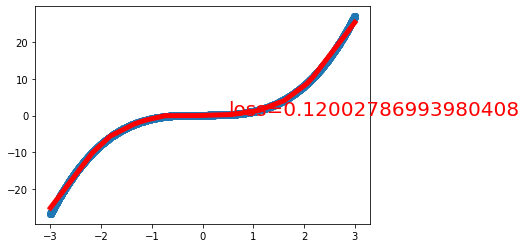

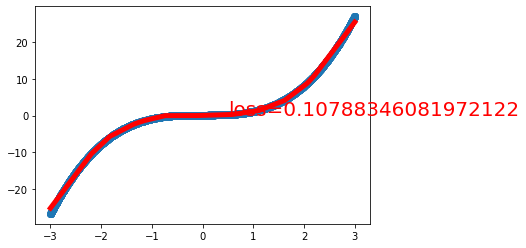

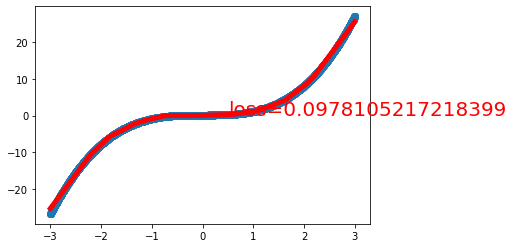

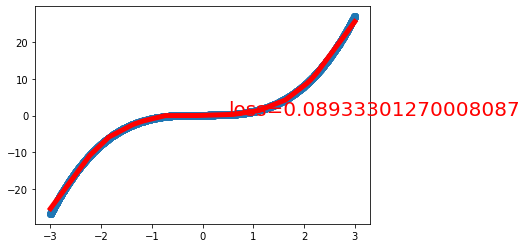

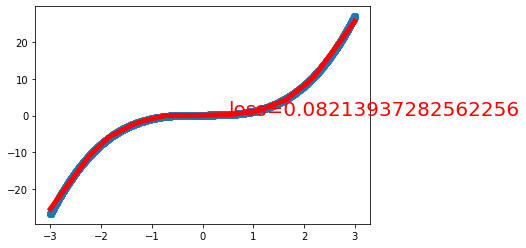

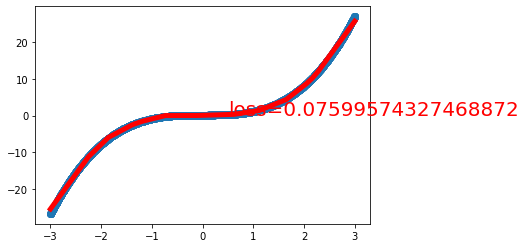

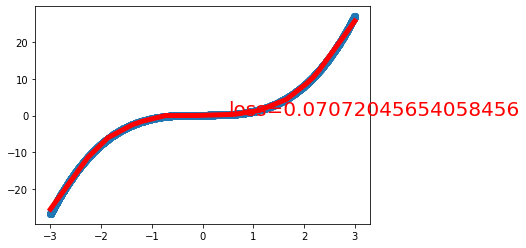

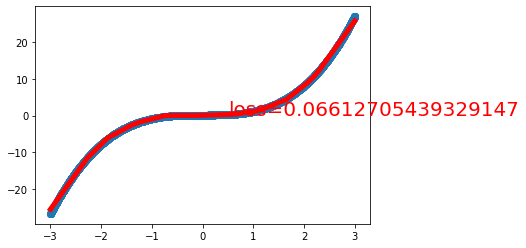

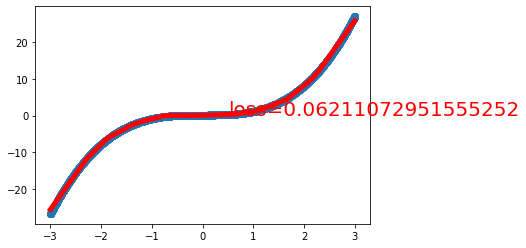

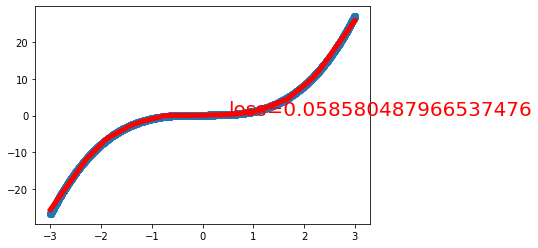

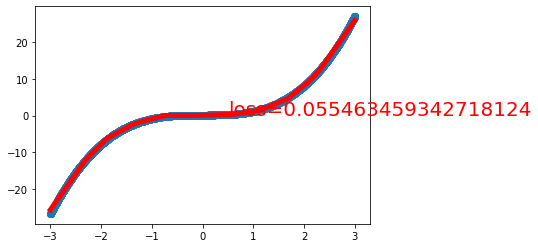

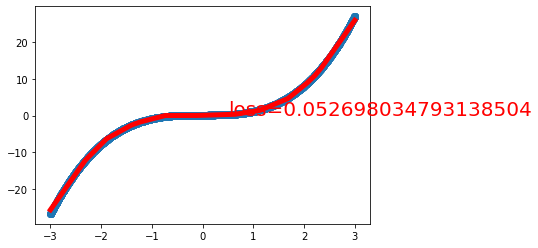

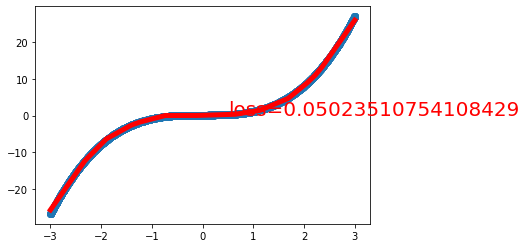

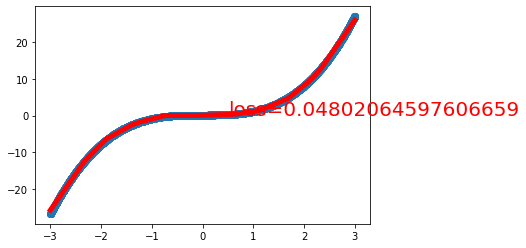

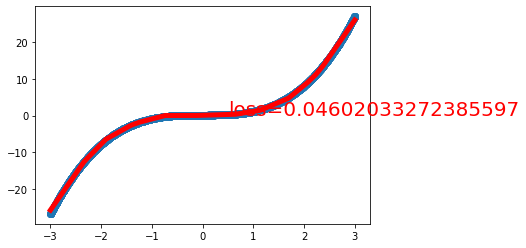

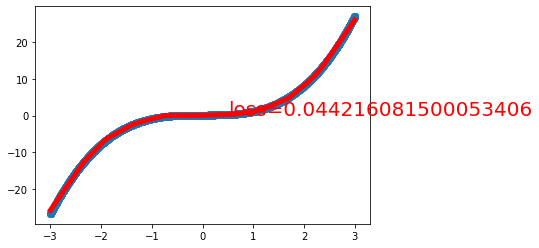

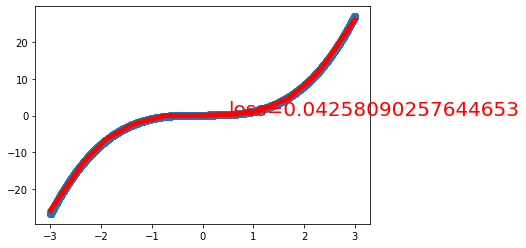

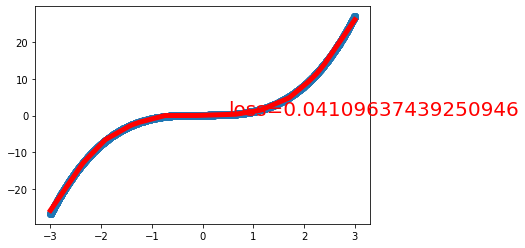

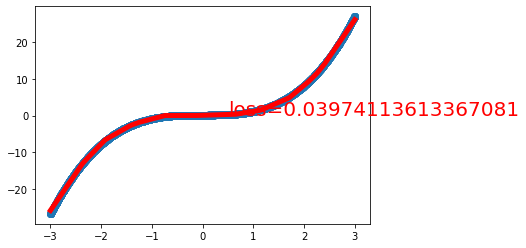

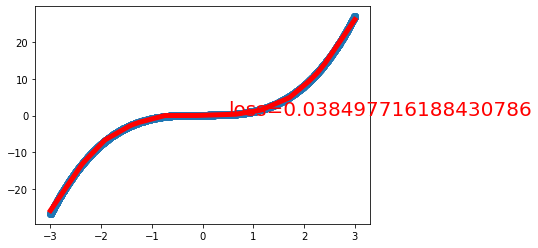

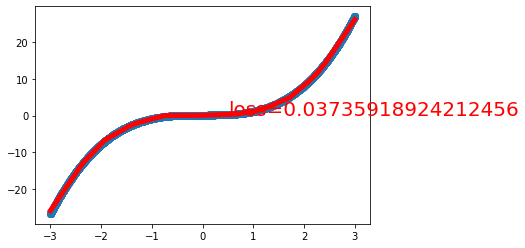

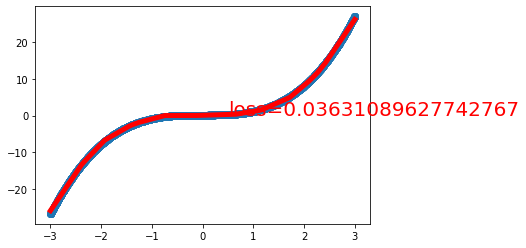

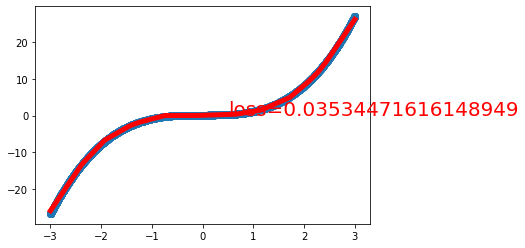

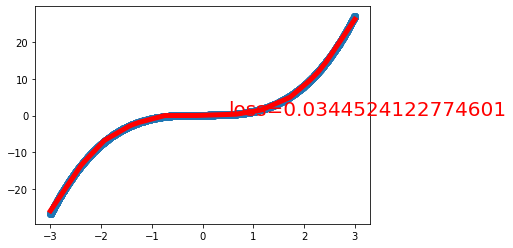

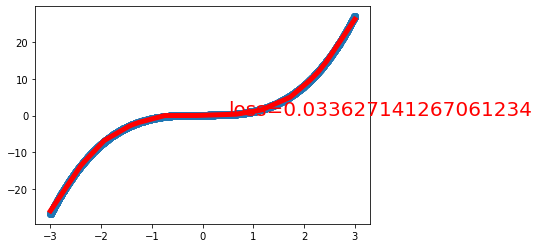

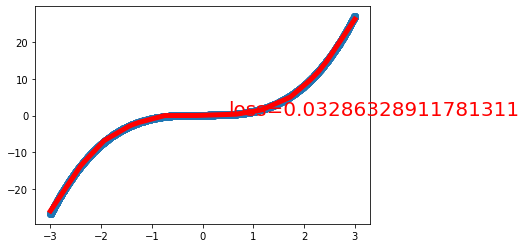

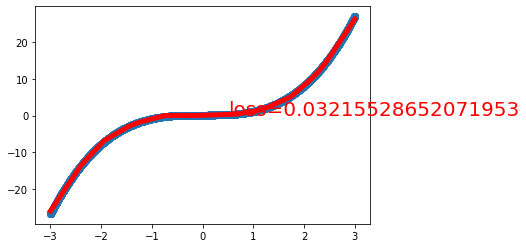

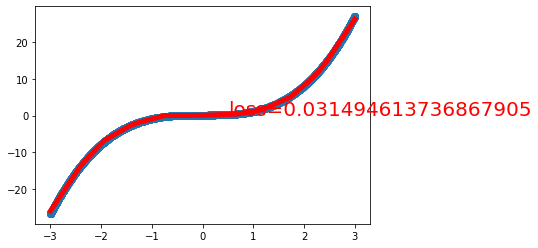

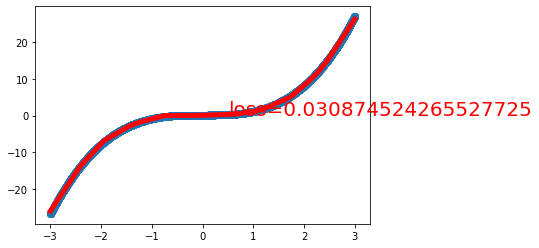

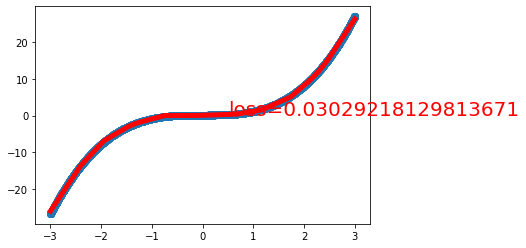

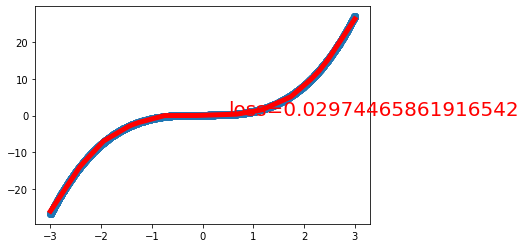

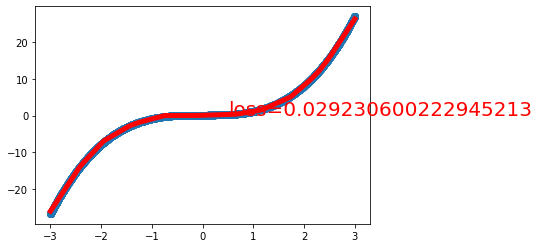

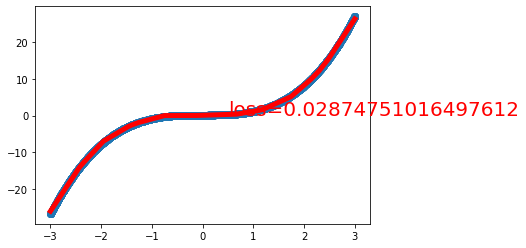

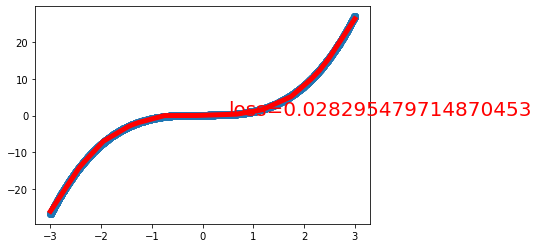

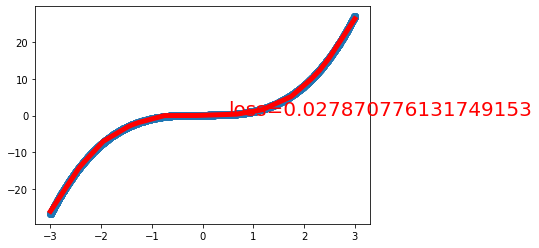

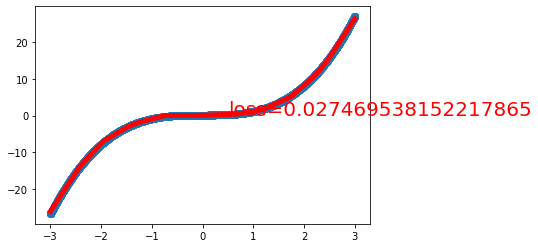

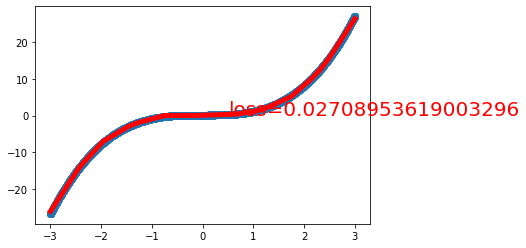

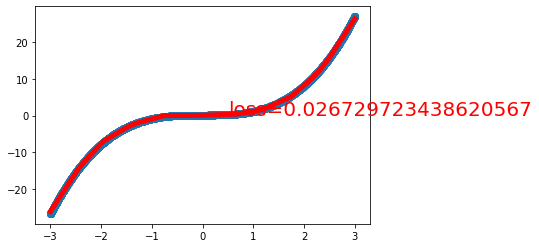

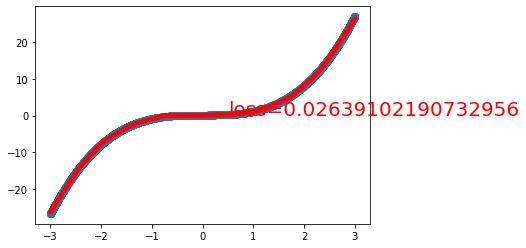

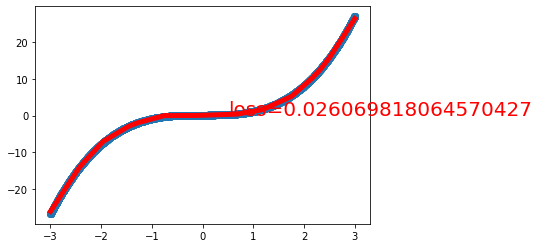

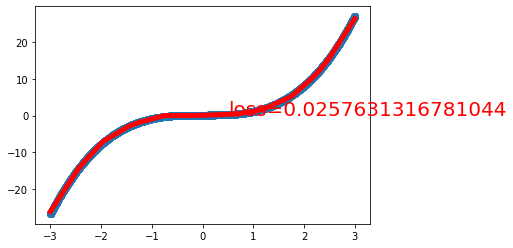

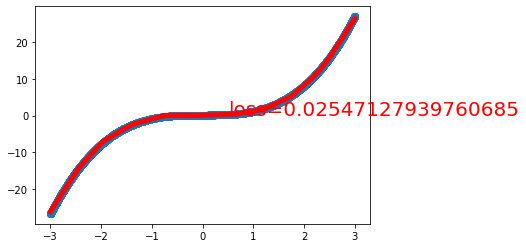

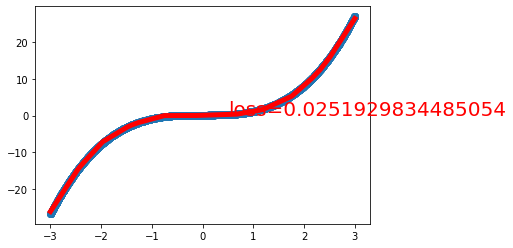

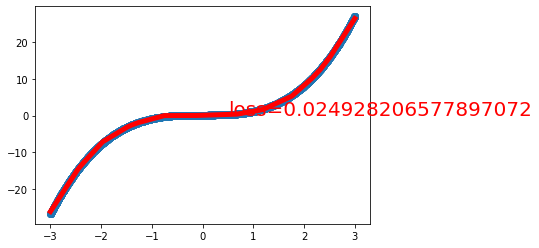

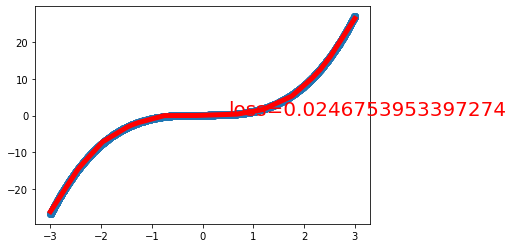

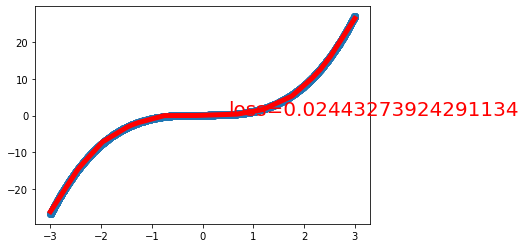

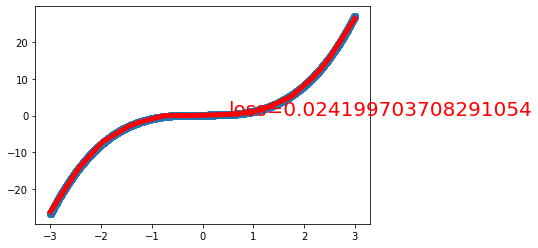

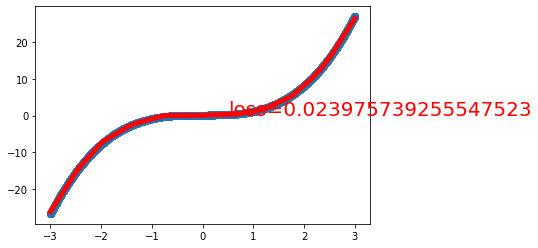

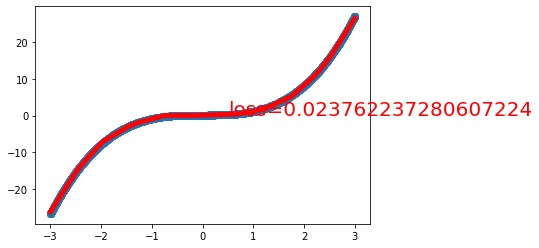

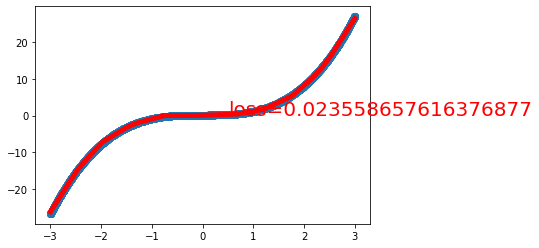

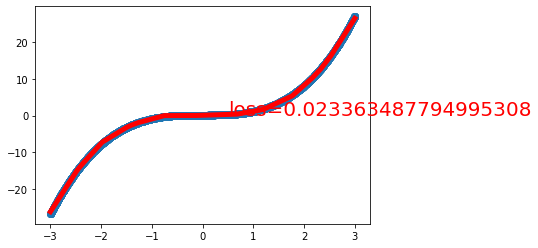

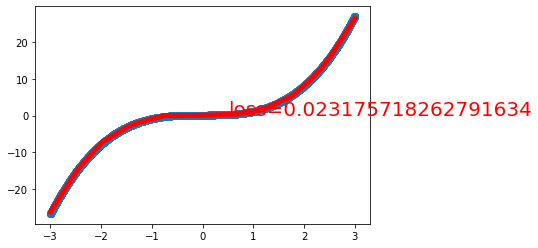

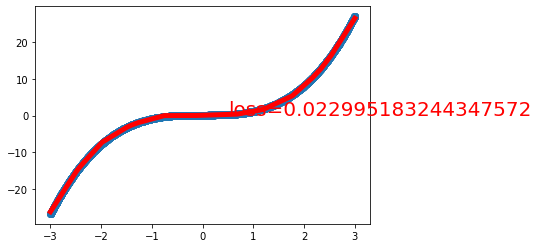

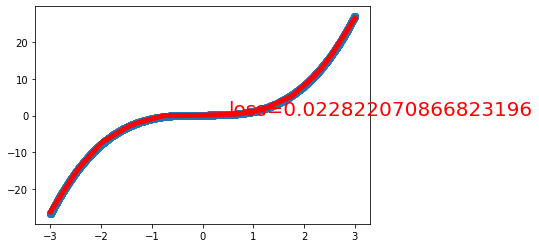

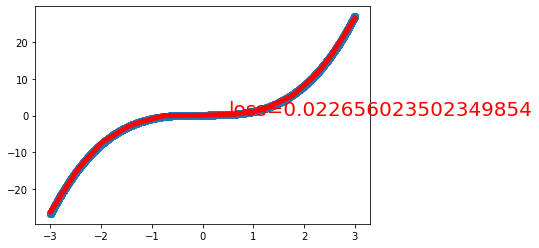

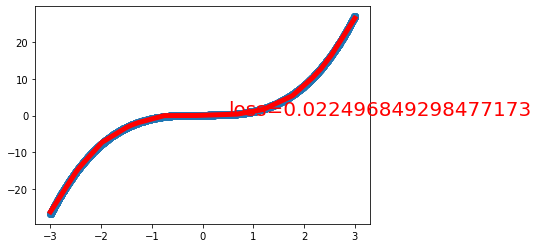

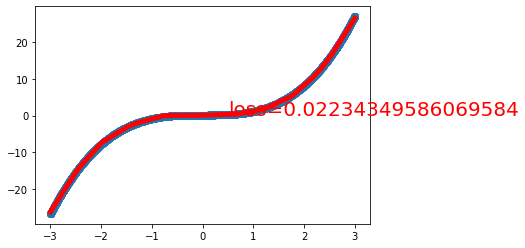

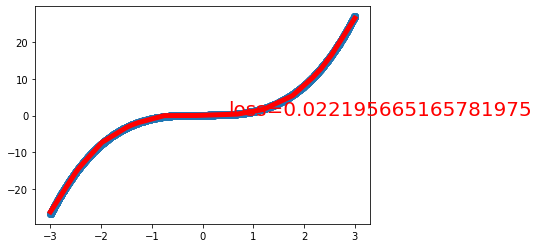

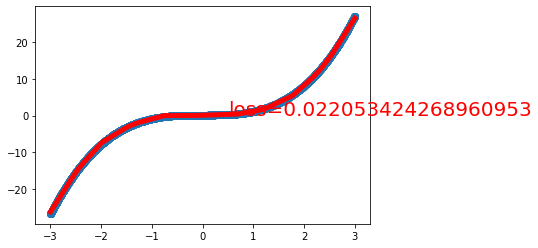

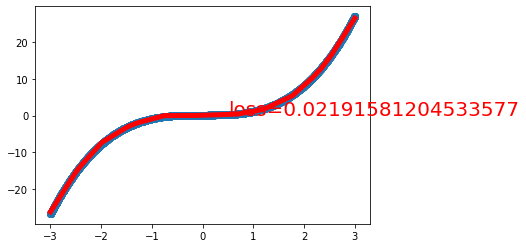

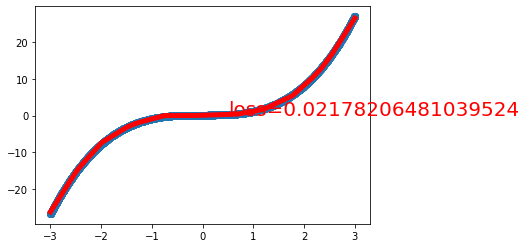

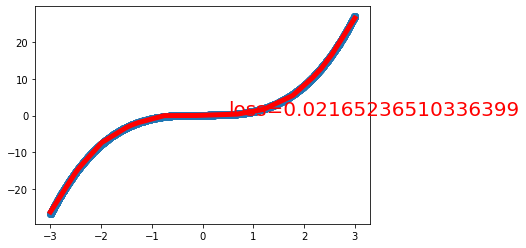

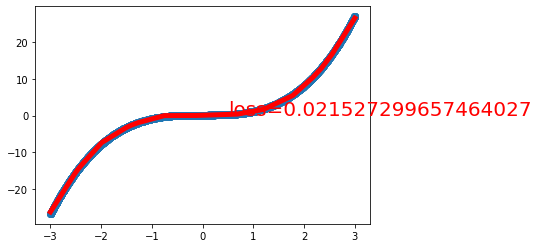

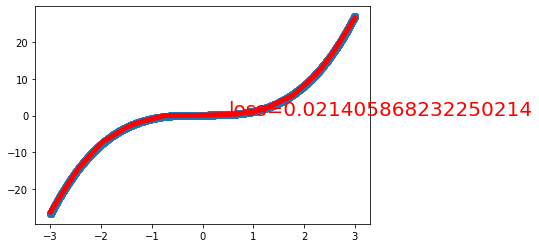

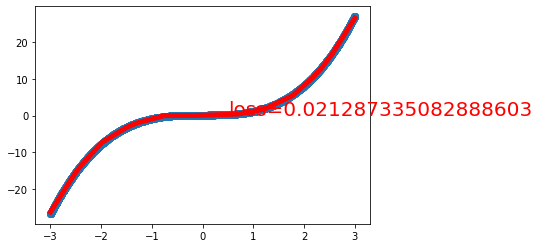

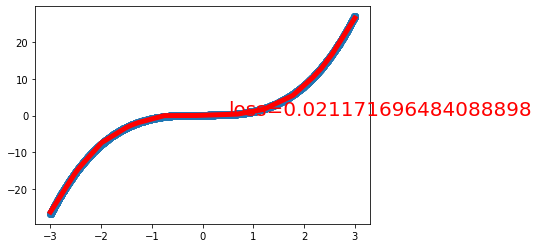

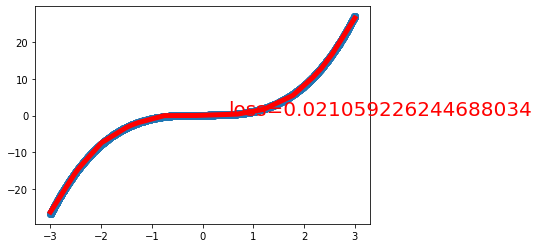

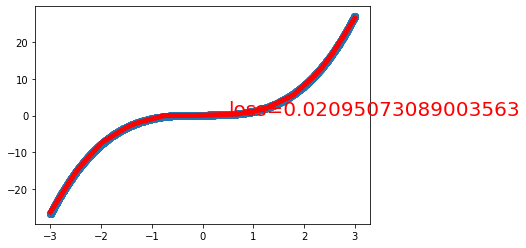

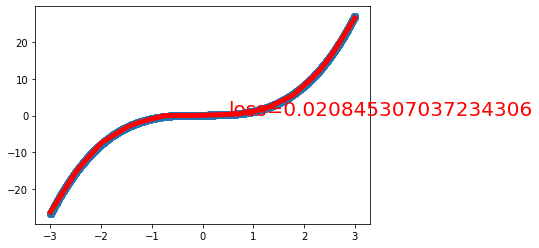

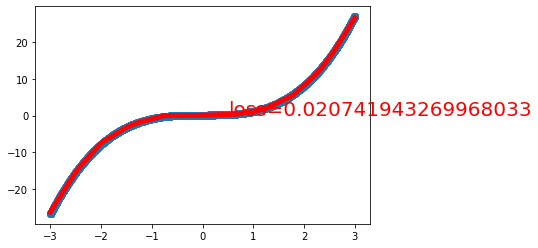

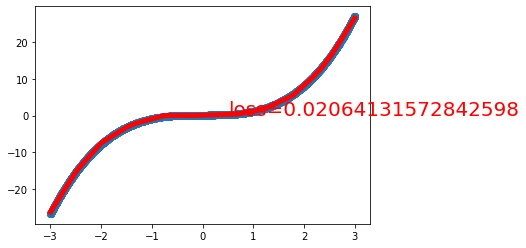

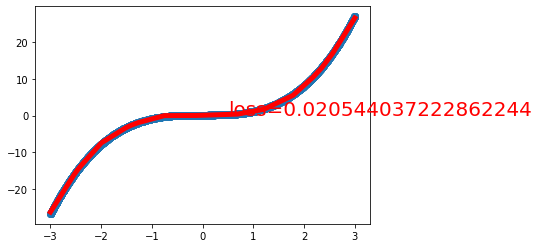

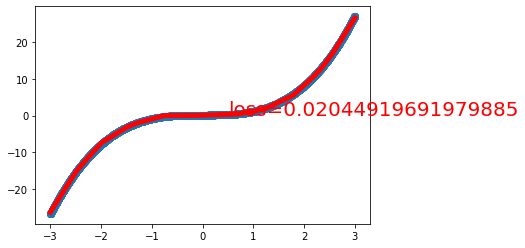

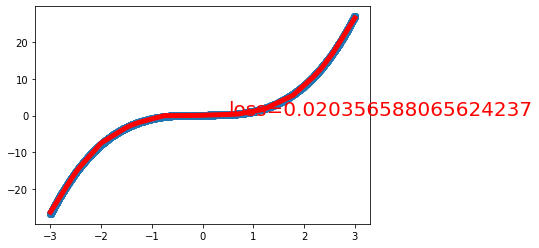

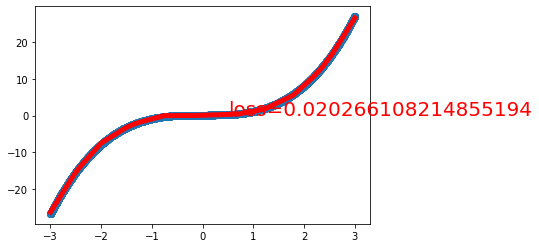

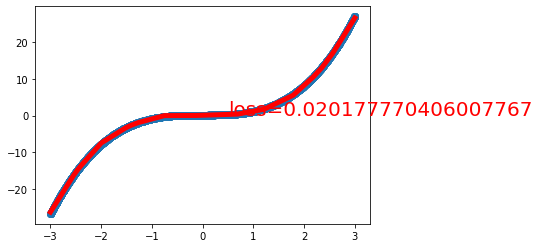

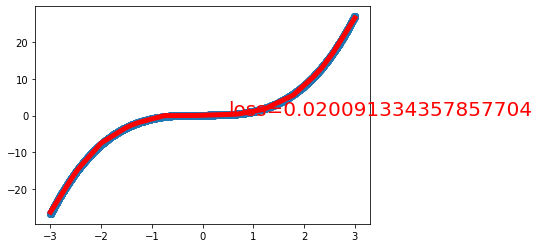

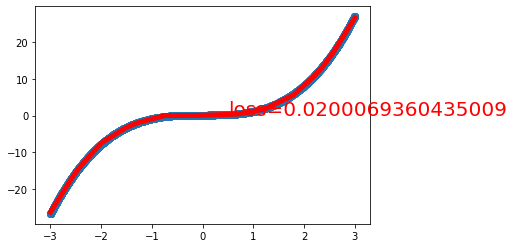

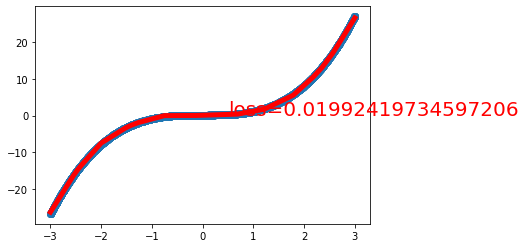

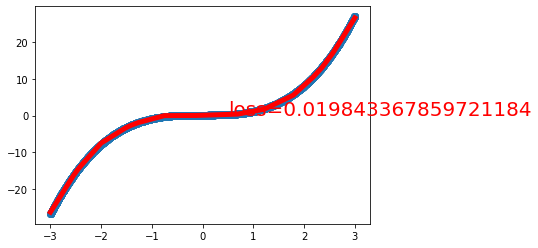

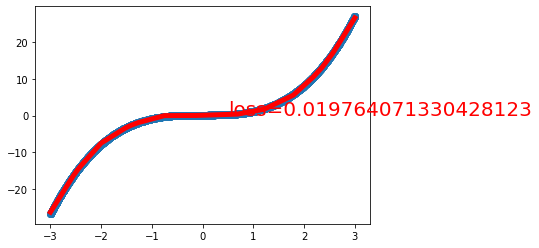

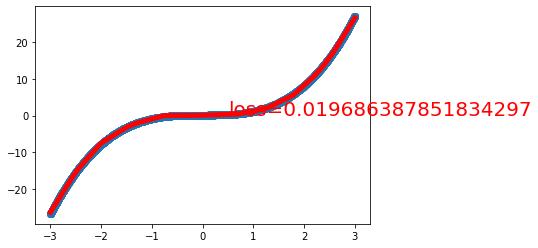

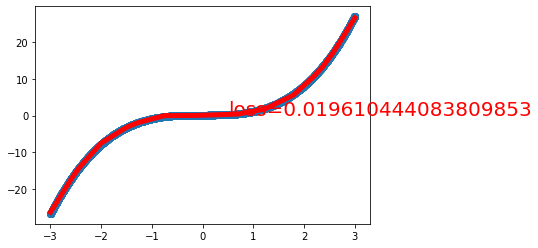

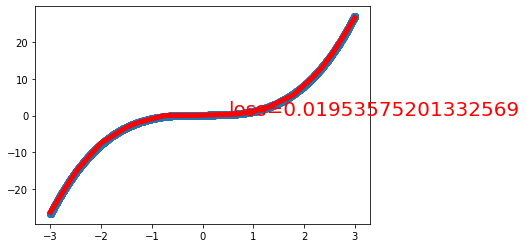

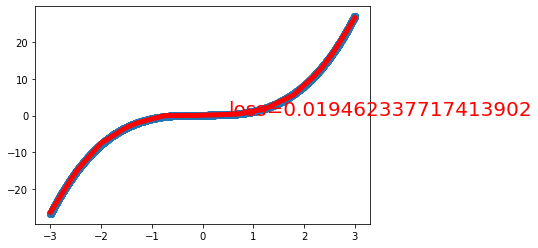

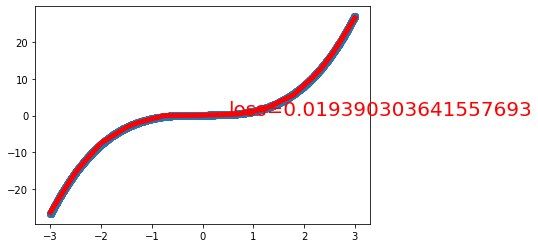

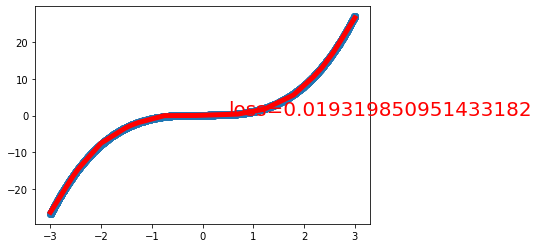

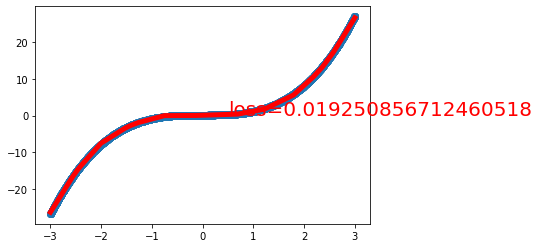

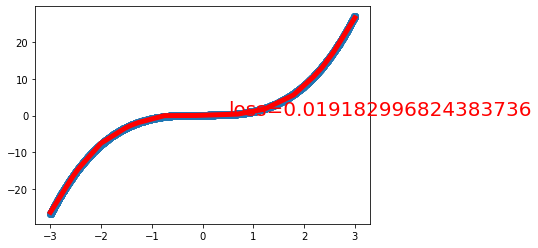

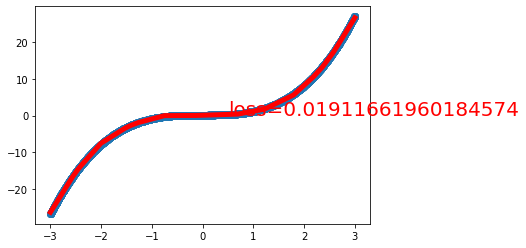

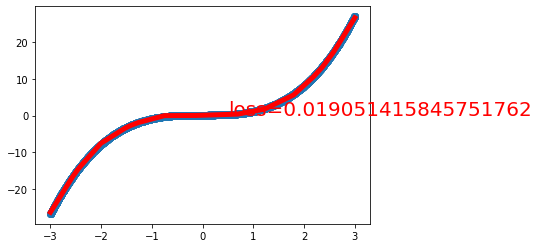

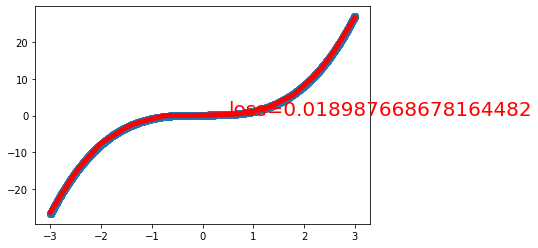

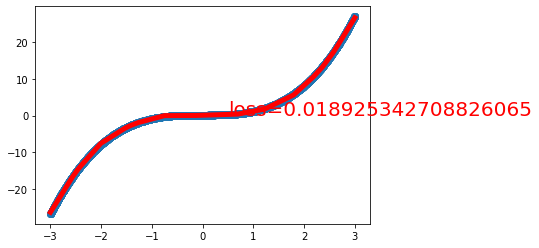

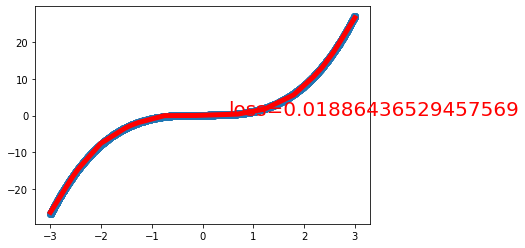

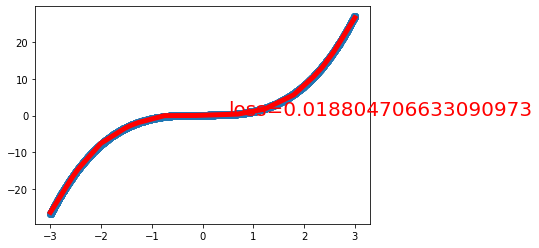

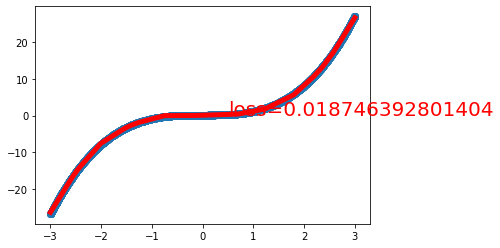

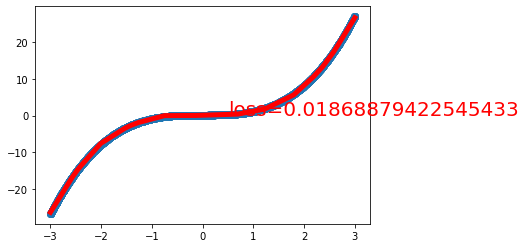

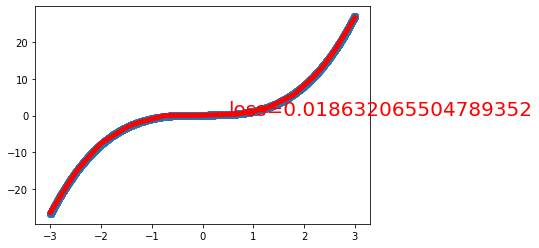

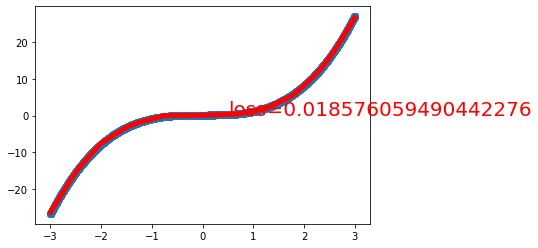

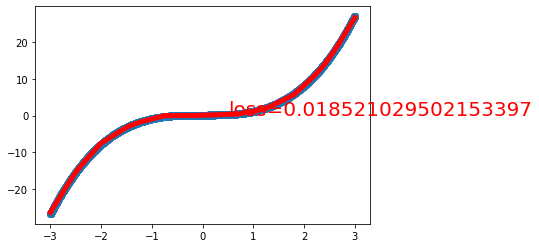

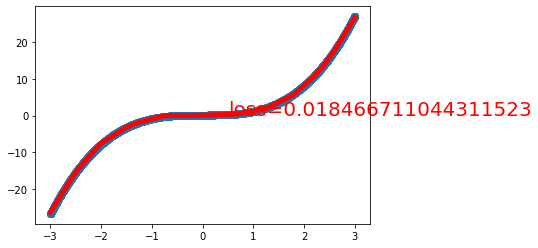

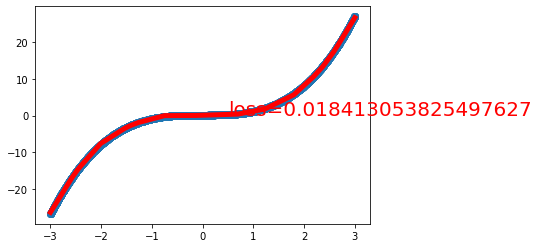

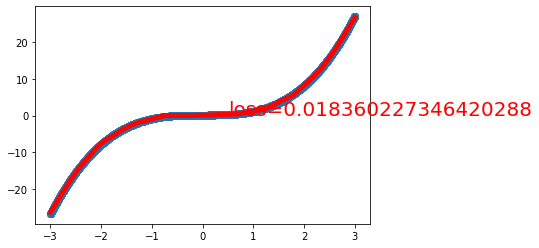

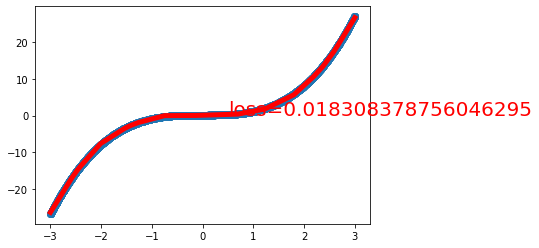

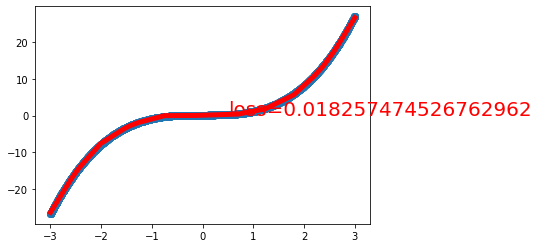

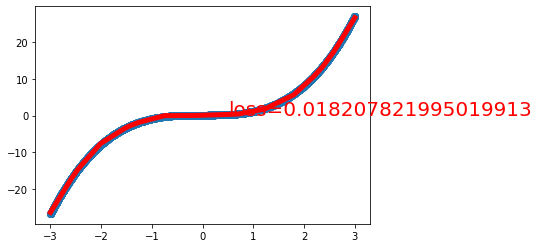

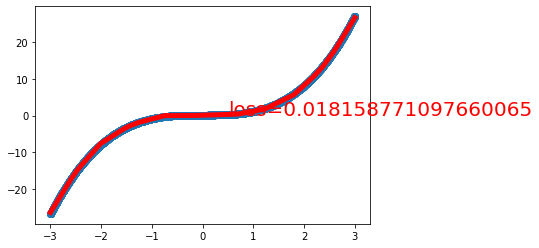

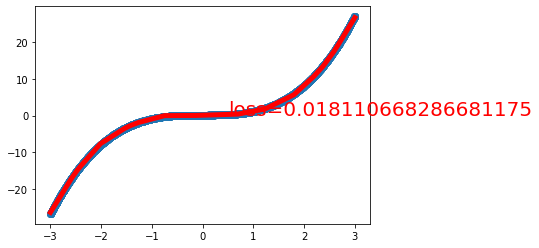

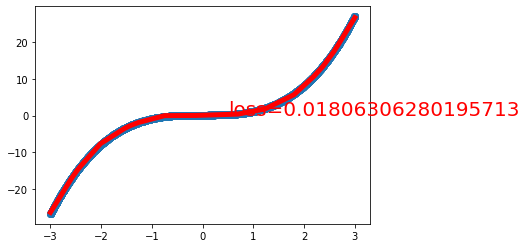

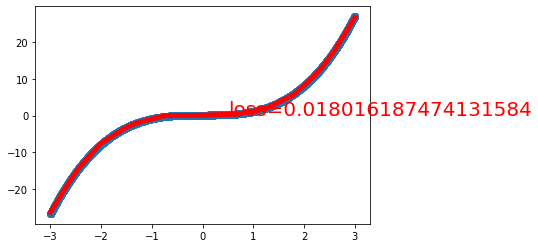

In [10]:
net, loss = train(net, criterion, optimizer, 10000)

In [11]:
print("final loss:", loss.item())

final loss: 0.017970362678170204
